In [1]:
import pandas
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np

In [2]:
shuffles = pandas.read_csv("shuffles.csv", header=None, names=range(1,9991))

In [3]:
shuffles

,1,2,3,4,5,6,7,8,9,10,...,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990
0,3330,1988,173,3598,8490,7976,7569,5078,6469,1289,...,2510,6899,6546,4167,7984,8164,1070,8414,6729,9102
1,9605,9381,3732,2976,1572,8660,8119,5148,1221,7462,...,7601,9390,8867,9576,3052,2461,6959,2377,2117,3784
2,6916,3629,4708,107,9498,7377,6203,8777,2373,2367,...,823,3252,8910,4749,9156,3875,6658,5267,3127,3078
3,8273,1703,7849,9125,1120,916,776,3984,521,2484,...,2876,9164,778,7310,1185,56,1112,8104,974,1416
4,2577,8617,4510,1278,7060,8587,4574,6506,6067,2692,...,1280,8917,199,6512,8317,6359,3620,8183,2540,3562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,6336,2653,7734,9002,6985,9963,4232,9577,3632,7129,...,4099,1699,2739,2741,8663,9794,1803,8080,8912,8181
596,4472,8166,2209,3023,6620,7334,5931,5481,6670,9568,...,6660,8498,8041,8300,9359,5566,4133,7922,3403,7069
597,546,8594,1399,5774,8312,2335,4577,2956,5137,9895,...,4140,1587,7588,7907,1550,7031,7660,8893,675,6685
598,1482,1590,4395,7461,7644,7274,8170,9127,3049,5314,...,4451,4961,5608,529,6058,3164,6993,1526,7784,798


In the ideal case, the image should be uniformly noisy.

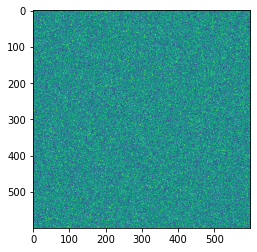

In [4]:
plt.imshow(shuffles.iloc[:, 1:shuffles.shape[0]])

In [5]:
plt.imsave('full-shuffle.png', shuffles.iloc[:, 1:shuffles.shape[0]])

Checking some basic invariants:

- All numbers should be present in the shuffle.

In [6]:
ids = set(range(1, 9991))
for index, row in shuffles.iterrows():
    as_set = set(row)
    assert as_set == ids

Trying to find bias in the shuffling, in terms of distribution of multiples. Should lower numbers have better multiples because their multiple is shuffled away?

In [7]:
def multiple(swapIndex):
    if swapIndex <= 3054:
        return 6
    elif swapIndex <= 5672:
        return 7
    elif swapIndex <= 7963:
        return 8
    else:
        return 9


In [8]:
multiples = shuffles.transform(lambda xs: [multiple(x) for x in xs])
multiples

,1,2,3,4,5,6,7,8,9,10,...,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990
0,7,6,6,7,9,9,8,7,8,6,...,6,8,8,7,9,9,6,9,8,9
1,9,9,7,6,6,9,9,7,6,8,...,8,9,9,9,6,6,8,6,6,7
2,8,7,7,6,9,8,8,9,6,6,...,6,7,9,7,9,7,8,7,7,7
3,9,6,8,9,6,6,6,7,6,6,...,6,9,6,8,6,6,6,9,6,6
4,6,9,7,6,8,9,7,8,8,6,...,6,9,6,8,9,8,7,9,6,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,8,6,8,9,8,9,7,9,7,8,...,7,6,6,6,9,9,6,9,9,9
596,7,9,6,6,8,8,8,7,8,9,...,8,9,9,9,9,7,7,8,7,8
597,6,9,6,8,9,6,7,6,7,9,...,7,6,8,8,6,8,8,9,6,8
598,6,6,7,8,8,8,9,9,6,7,...,7,7,7,6,8,7,8,6,8,6


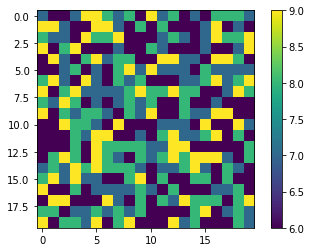

In [9]:
im = plt.imshow(multiples.iloc[0:20, 0:20])
plt.colorbar(im)

| multiple | frequency | range       |
|----------|-----------|-------------|
|    6     |   3054    | 1-3054      |
|    7     |   2618    | 3055 - 5672 | 
|    8     |   2291    | 5773 - 7973 |
|    9     |   2027    | 7974 - 9990 |

For a sample of size 20, there should be around 6.1 6s, 5.2 7s, 4.5 8s, 4.0 9s. If there is 

| multiple | frequency |
|----------|-----------|
|    6     |   6.1     | 
|    7     |   2.5     | 
|    8     |   4.5     |
|    9     |   4.0     | 


The above plot for the last indices

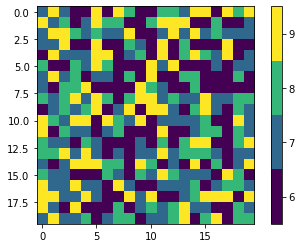

In [20]:
im = plt.imshow(multiples.iloc[0:20, -20:])
values = [6, 7, 8, 9]
plt.colorbar(im, values=values, ticks=values)
plt.savefig("plot1.pdf")

How does it look at the end of the first band? From 3024 to 3044?

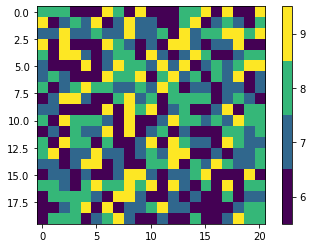

In [21]:
im = plt.imshow(multiples.iloc[0:20, 3023:3044])
plt.colorbar(im, values=values, ticks=values)
plt.savefig("plot2.pdf")

Doesn't really look so biased

## How likely are fixed points?

In [94]:
indices = []
for idx in range(1, 9991):
    fixed = shuffles[shuffles[idx] == idx]
    if not fixed.empty:
        indices.append((idx, fixed.index.tolist()[0]))
print(indices)

[(32, 150), (37, 362), (57, 235), (60, 131), (96, 323), (119, 74), (129, 317), (143, 537), (175, 322), (177, 269), (187, 333), (193, 125), (199, 575), (201, 506), (211, 126), (217, 170), (232, 342), (266, 308), (303, 399), (320, 260), (321, 499), (326, 253), (328, 378), (363, 522), (366, 161), (386, 407), (420, 208), (445, 481), (506, 38), (510, 552), (550, 146), (570, 251), (596, 209), (608, 540), (611, 143), (612, 76), (626, 88), (656, 593), (665, 446), (668, 263), (674, 303), (695, 330), (702, 199), (742, 335), (746, 8), (839, 424), (865, 42), (883, 47), (887, 563), (974, 527), (1001, 236), (1022, 238), (1029, 304), (1056, 55), (1077, 264), (1084, 262), (1091, 575), (1098, 311), (1106, 594), (1118, 539), (1132, 194), (1191, 288), (1194, 576), (1250, 64), (1267, 328), (1282, 564), (1287, 520), (1319, 304), (1361, 588), (1386, 79), (1437, 452), (1440, 197), (1456, 206), (1458, 264), (1462, 564), (1476, 539), (1479, 111), (1487, 206), (1492, 472), (1523, 265), (1528, 529), (1543, 580),

In [80]:
print(shuffles[9980].loc[305])
print(shuffles[6753].loc[131])

9980
6753


### Probability of this happening:

In [85]:
len(indices)

604

#### Probability of this happening overall

In [88]:
print(len(indices) / (600 * 9990))

0.00010076743410076744


#### Expected number of times this happens in a reveal of 1, ..., 9990

In [91]:
print(len(indices) / 600)

1.0066666666666666


In [99]:
len(set([b for (a, b) in indices]))

377

Probability should converge to $1 - \frac{1}{e} \approx 0.63$. Using https://en.wikipedia.org/wiki/Derangement#Growth_of_number_of_derangements_as_n_approaches_%E2%88%9E

In [171]:
377 / 600

0.6283333333333333